# JURNAL MODUL 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

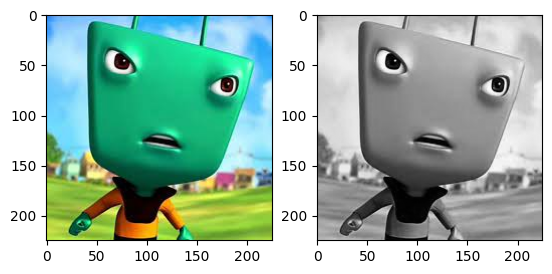

In [2]:
image = plt.imread('adudu.jpg')
plt.subplot(1, 2, 1)
plt.imshow(image)

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')

In [3]:
kernelm_3 = np.full((3,3), 1/9)

kernelm_9 = np.full((9,9), 1/81)

kernel_sh = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 8/9, 1/9],
    [1/9, 1/9, 1/9]
])

kernel_sm = np.array([
    [1/10, 1/10, 1/10],
    [1/10, 1/5, 1/10],
    [1/10, 1/10, 1/10]
])

In [4]:
def meanShSm_filter(image, kernel):
    height_image, width_image = image.shape
    height_kernel, width_kernel = kernel.shape

    height_center = int((height_kernel - 1) / 2)
    width_center = int((width_kernel - 1) / 2)

    left_padding = width_center
    right_padding = width_kernel - width_center
    top_padding = height_center
    bottom_padding = height_kernel - height_center

    padded_image = np.pad(image, ((left_padding, right_padding), (top_padding, bottom_padding)), mode='edge')

    result = np.zeros([height_image, width_image])

    for i in range(height_image):
        for j in range(width_image):
            temp = 0
            for k in range(height_kernel):
                for l in range(width_kernel):
                    temp += padded_image[i+k, j+l] * kernel[k, l]
            result[i, j] = temp
    
    return result

In [5]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num, value in count.items():
        if value > max_count:
            max_count = value
            modus = num

    return modus

In [6]:
def median(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]
    
    return median

In [7]:
def modus_filter(image, kernel):
    height_image, width_image = image.shape
    height_kernel, width_kernel = kernel.shape

    height_center = int((height_kernel - 1) / 2)
    width_center = int((width_kernel - 1) / 2)

    left_padding = width_center
    right_padding = (width_kernel - 1) - width_center
    top_padding = height_center
    bottom_padding = (height_kernel - 1) - height_center

    padded_image = np.pad(image, ((left_padding, right_padding), (top_padding, bottom_padding)), mode='edge')

    result = np.zeros([height_image, width_image])

    for i in range(height_image):
        for j in range(width_image):
            temp = np.zeros(len(kernel) * len(kernel))
            index = 0
            for k in range(height_kernel):
                for l in range(width_kernel):
                    temp[index] += padded_image[i+k, j+l]
                    index += 1
                    result[i, j] = modus(temp)

    return result

In [8]:
def median_filter(image, kernel):
    height_image, width_image = image.shape
    height_kernel, width_kernel = kernel.shape

    height_center = int((height_kernel - 1) / 2)
    width_center = int((width_kernel - 1) / 2)

    left_padding = width_center
    right_padding = width_kernel - width_center
    top_padding = height_center
    bottom_padding = height_kernel - height_center

    padded_image = np.pad(image, ((left_padding, right_padding), (top_padding, bottom_padding)), mode='edge')

    result = np.zeros([height_image, width_image])

    for i in range(height_image):
        for j in range(width_image):
            temp = np.zeros(len(kernel) * len(kernel))
            index = 0
            for k in range(height_kernel):
                for l in range(width_kernel):
                    temp[index] += padded_image[i+k, j+l]
                    index += 1
                    result[i, j] = median(temp)

    return result

In [9]:
mean_3 = meanShSm_filter(gray_image, kernelm_3)
mean_9 = meanShSm_filter(gray_image, kernelm_9)

modus_3 = modus_filter(gray_image, kernelm_3)
modus_9 = modus_filter(gray_image, kernelm_9)

median_3 = median_filter(gray_image, kernelm_3)
median_9 = median_filter(gray_image, kernelm_9)

sharpening = meanShSm_filter(gray_image, kernel_sh)

smoothing = meanShSm_filter(gray_image, kernel_sm)

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

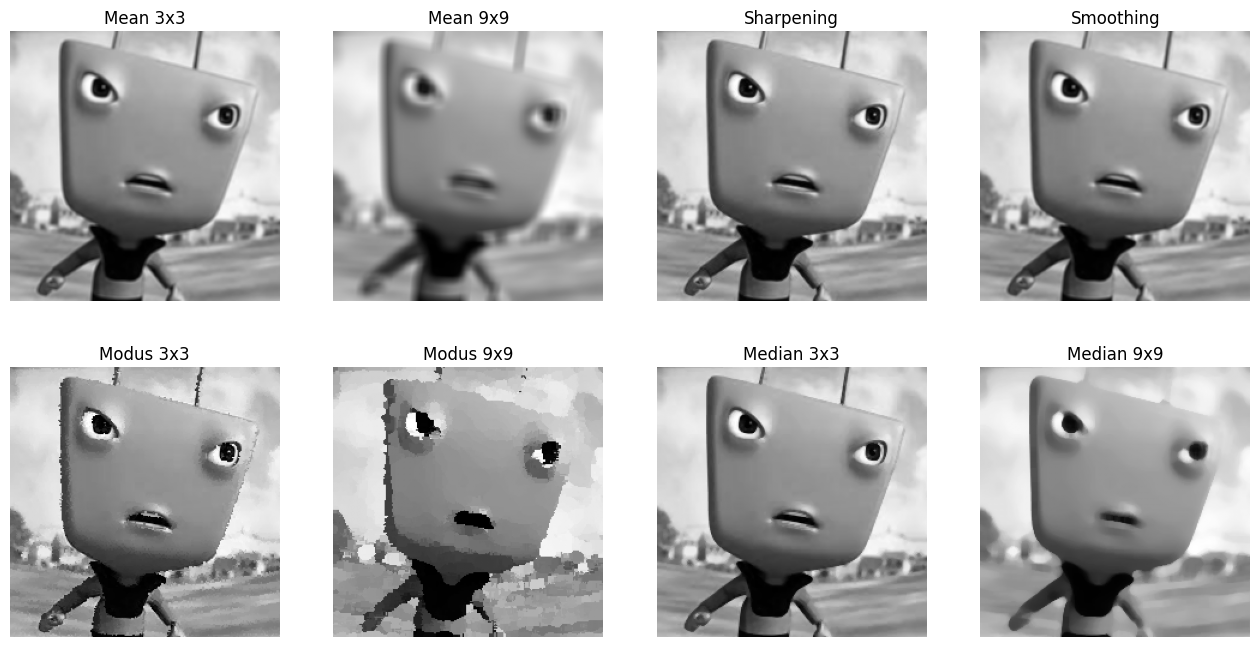

In [10]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.imshow(mean_3, cmap='gray')
plt.title('Mean 3x3')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(mean_9, cmap='gray')
plt.title('Mean 9x9')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sharpening, cmap='gray')
plt.title('Sharpening')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(smoothing, cmap='gray')
plt.title('Smoothing')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(modus_3, cmap='gray')
plt.title('Modus 3x3')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(modus_9, cmap='gray')
plt.title('Modus 9x9')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(median_3, cmap='gray')
plt.title('Median 3x3')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(median_9, cmap='gray')
plt.title('Median 9x9')
plt.axis('off')

In [11]:
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

Px = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
Py = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

Rx = np.array([[1, 0,], [0, -1]])
Ry = np.array([[0, 1], [-1, 0]])

In [12]:
def convolution(image, kernel, padd):
    result = np.zeros([image.shape[0], image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    result[i][j] += padd[i+k, j+l] * kernel[k, l]
                    
    return result

In [13]:
def findGradient(image, kernel): 
    centerX, centerY = int((kernel.shape[0] - 1)/2), int((kernel.shape[1] - 1)/2)
    padded_image =  np.pad(array = image, pad_width = ((centerX, kernel.shape[0]-1-centerX), (centerY, kernel.shape[1]-1-centerY)), mode ="constant") 
    
    return convolution(image, kernel, padded_image)

In [14]:
def detect(image, kernelX, kernelY):
  resultX = findGradient(image, kernelX)
  resultY = findGradient(image, kernelY)
  result = abs(resultX) + abs(resultY)
  
  return result

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

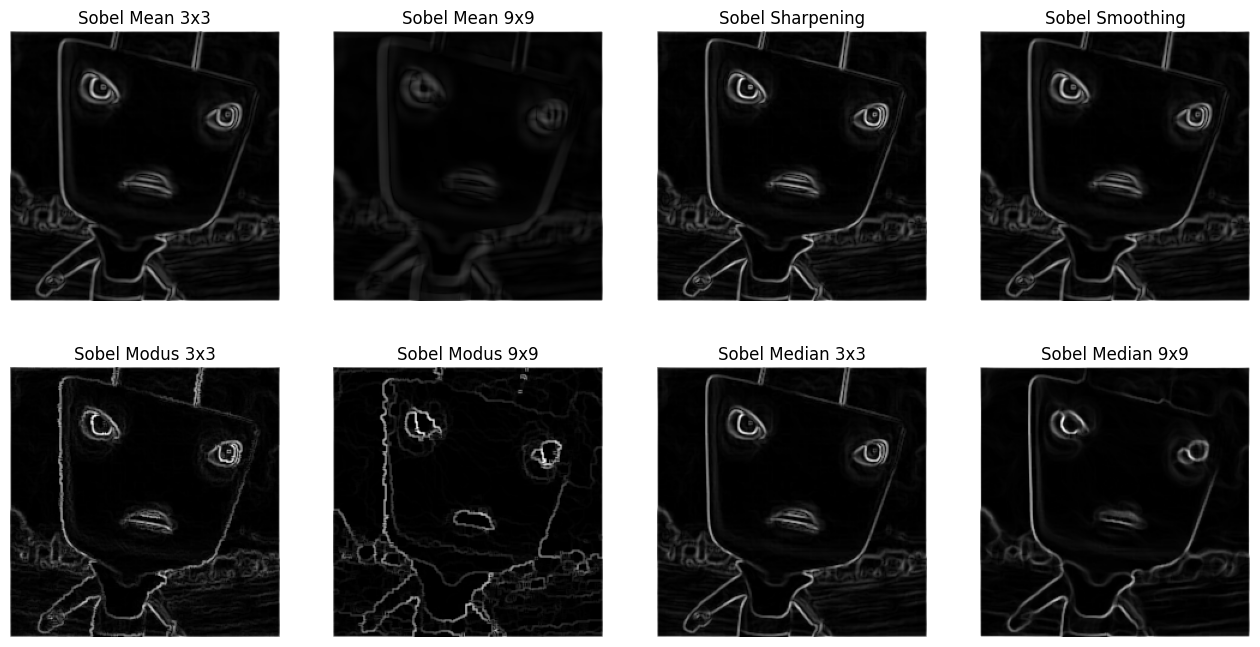

In [15]:
plt.figure(figsize=(16, 8))

sobel_mean3 = detect(mean_3, Sx, Sy)
plt.subplot(2, 4, 1)
plt.imshow(sobel_mean3, cmap='gray')
plt.title('Sobel Mean 3x3')
plt.axis('off')

sobel_mean9 = detect(mean_9, Sx, Sy)
plt.subplot(2, 4, 2)
plt.imshow(sobel_mean9, cmap='gray')
plt.title('Sobel Mean 9x9')
plt.axis('off')

sobel_sharp = detect(sharpening, Sx, Sy)
plt.subplot(2, 4, 3)
plt.imshow(sobel_sharp, cmap='gray')
plt.title('Sobel Sharpening')
plt.axis('off')

sobel_smooth = detect(smoothing, Sx, Sy)
plt.subplot(2, 4, 4)
plt.imshow(sobel_smooth, cmap='gray')
plt.title('Sobel Smoothing')
plt.axis('off')

sobel_modus3 = detect(modus_3, Px, Py)
plt.subplot(2, 4, 5)
plt.imshow(sobel_modus3, cmap='gray')
plt.title('Sobel Modus 3x3')
plt.axis('off')

sobel_modus9 = detect(modus_9, Px, Py)
plt.subplot(2, 4, 6)
plt.imshow(sobel_modus9, cmap='gray')
plt.title('Sobel Modus 9x9')
plt.axis('off')

sobel_median3 = detect(median_3, Px, Py)
plt.subplot(2, 4, 7)
plt.imshow(sobel_median3, cmap='gray')
plt.title('Sobel Median 3x3')
plt.axis('off')

sobel_median9 = detect(median_9, Px, Py)
plt.subplot(2, 4, 8)
plt.imshow(sobel_median9, cmap='gray')
plt.title('Sobel Median 9x9')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

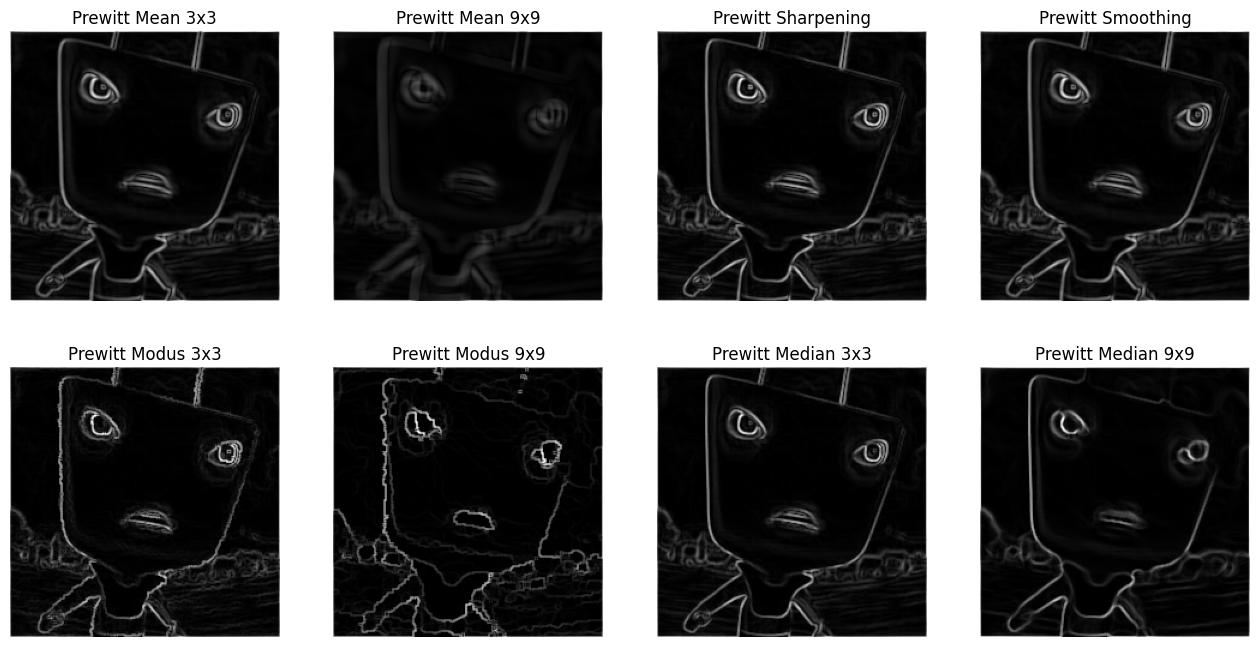

In [16]:
plt.figure(figsize=(16, 8))

prewitt_mean3 = detect(mean_3, Px, Py)
plt.subplot(2, 4, 1)
plt.imshow(prewitt_mean3, cmap='gray')
plt.title('Prewitt Mean 3x3')
plt.axis('off')

prewitt_mean9 = detect(mean_9, Px, Py)
plt.subplot(2, 4, 2)
plt.imshow(prewitt_mean9, cmap='gray')
plt.title('Prewitt Mean 9x9')
plt.axis('off')

prewitt_sharp = detect(sharpening, Px, Py)
plt.subplot(2, 4, 3)
plt.imshow(prewitt_sharp, cmap='gray')
plt.title('Prewitt Sharpening')
plt.axis('off')

prewitt_smooth = detect(smoothing, Px, Py)
plt.subplot(2, 4, 4)
plt.imshow(prewitt_smooth, cmap='gray')
plt.title('Prewitt Smoothing')
plt.axis('off')

prewitt_modus3 = detect(modus_3, Px, Py)
plt.subplot(2, 4, 5)
plt.imshow(prewitt_modus3, cmap='gray')
plt.title('Prewitt Modus 3x3')
plt.axis('off')

prewitt_modus9 = detect(modus_9, Px, Py)
plt.subplot(2, 4, 6)
plt.imshow(prewitt_modus9, cmap='gray')
plt.title('Prewitt Modus 9x9')
plt.axis('off')

prewitt_median3 = detect(median_3, Px, Py)
plt.subplot(2, 4, 7)
plt.imshow(prewitt_median3, cmap='gray')
plt.title('Prewitt Median 3x3')
plt.axis('off')

prewitt_median9 = detect(median_9, Px, Py)
plt.subplot(2, 4, 8)
plt.imshow(prewitt_median9, cmap='gray')
plt.title('Prewitt Median 9x9')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

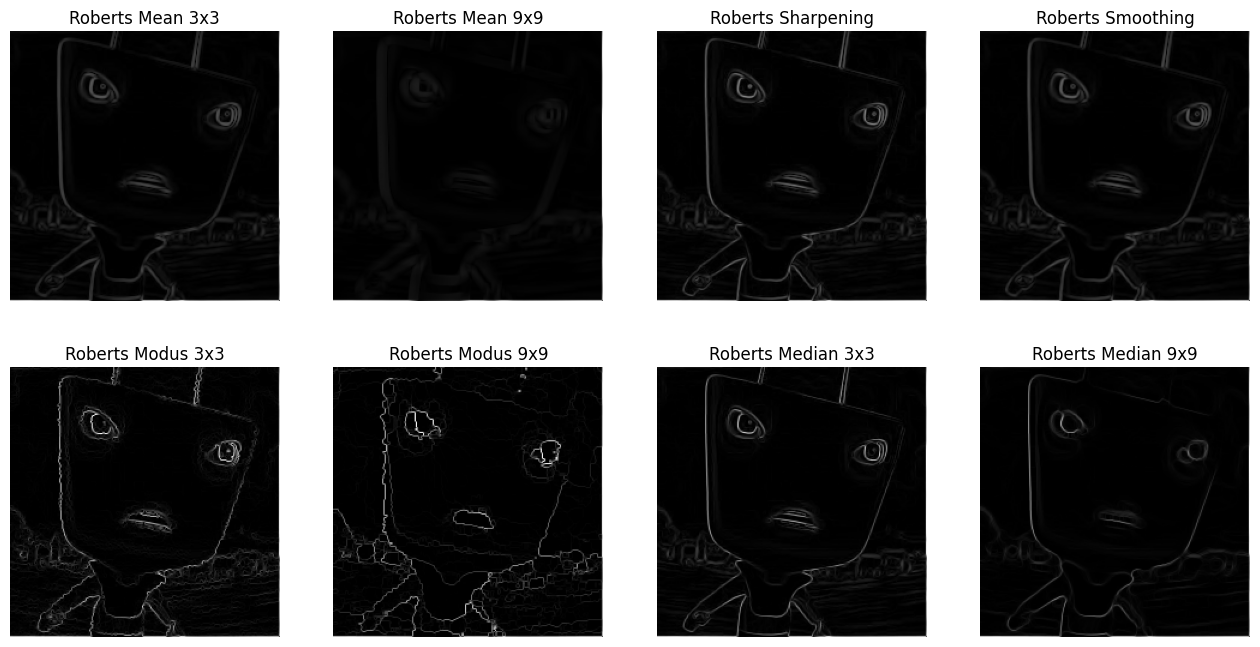

In [17]:
plt.figure(figsize=(16, 8))

roberts_mean3 = detect(mean_3, Rx, Ry)
plt.subplot(2, 4, 1)
plt.imshow(roberts_mean3, cmap='gray')
plt.title('Roberts Mean 3x3')
plt.axis('off')

roberts_mean9 = detect(mean_9, Rx, Ry)
plt.subplot(2, 4, 2)
plt.imshow(roberts_mean9, cmap='gray')
plt.title('Roberts Mean 9x9')
plt.axis('off')

roberts_sharp = detect(sharpening, Rx, Ry)
plt.subplot(2, 4, 3)
plt.imshow(roberts_sharp, cmap='gray')
plt.title('Roberts Sharpening')
plt.axis('off')

roberts_smooth = detect(smoothing, Rx, Ry)
plt.subplot(2, 4, 4)
plt.imshow(roberts_smooth, cmap='gray')
plt.title('Roberts Smoothing')
plt.axis('off')

roberts_modus3 = detect(modus_3, Rx, Ry)
plt.subplot(2, 4, 5)
plt.imshow(roberts_modus3, cmap='gray')
plt.title('Roberts Modus 3x3')
plt.axis('off')

roberts_modus9 = detect(modus_9, Rx, Ry)
plt.subplot(2, 4, 6)
plt.imshow(roberts_modus9, cmap='gray')
plt.title('Roberts Modus 9x9')
plt.axis('off')

roberts_median3 = detect(median_3, Rx, Ry)
plt.subplot(2, 4, 7)
plt.imshow(roberts_median3, cmap='gray')
plt.title('Roberts Median 3x3')
plt.axis('off')

roberts_median9 = detect(median_9, Rx, Ry)
plt.subplot(2, 4, 8)
plt.imshow(roberts_median9, cmap='gray')
plt.title('Roberts Median 9x9')
plt.axis('off')

Text(0.5, 1.0, 'Grayscale Image')

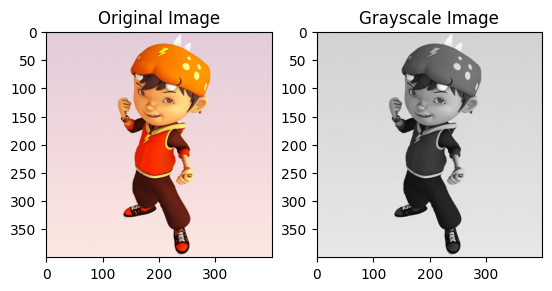

In [ ]:
image = plt.imread('boboiboy.jpg')
plt.subplot(1, 2, 1)
plt.imshow(image)

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')

In [19]:
kernelm_3 = np.full((3,3), 1/9)

kernelm_9 = np.full((9,9), 1/81)

kernel_sh = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 8/9, 1/9],
    [1/9, 1/9, 1/9]
])

kernel_sm = np.array([
    [1/10, 1/10, 1/10],
    [1/10, 1/5, 1/10],
    [1/10, 1/10, 1/10]
])

In [21]:
def meanShSm_filter(image, kernel):
    height_image, width_image = image.shape
    height_kernel, width_kernel = kernel.shape

    height_center = int((height_kernel - 1) / 2)
    width_center = int((width_kernel - 1) / 2)

    left_padding = width_center
    right_padding = width_kernel - width_center
    top_padding = height_center
    bottom_padding = height_kernel - height_center

    padded_image = np.pad(image, ((left_padding, right_padding), (top_padding, bottom_padding)), mode='edge')

    result = np.zeros([height_image, width_image])

    for i in range(height_image):
        for j in range(width_image):
            temp = 0
            for k in range(height_kernel):
                for l in range(width_kernel):
                    temp += padded_image[i+k, j+l] * kernel[k, l]
            result[i, j] = temp
    
    return result

In [22]:
mean_3 = meanShSm_filter(gray_image, kernelm_3)

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

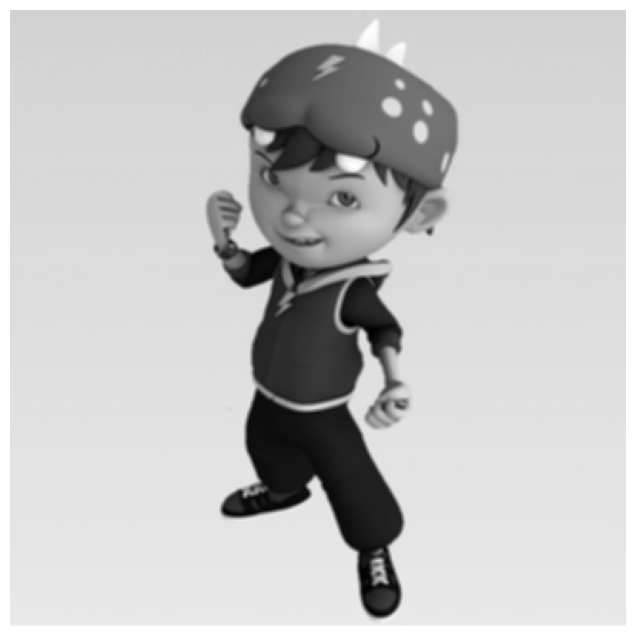

In [24]:
plt.figure(figsize=(16, 8))

plt.imshow(mean_3, cmap='gray')
plt.axis('off')

In [25]:
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

Px = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
Py = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

Rx = np.array([[1, 0,], [0, -1]])
Ry = np.array([[0, 1], [-1, 0]])

In [26]:
def convolution(image, kernel, padd):
    result = np.zeros([image.shape[0], image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    result[i][j] += padd[i+k, j+l] * kernel[k, l]
                    
    return result

In [27]:
def findGradient(image, kernel): 
    centerX, centerY = int((kernel.shape[0] - 1)/2), int((kernel.shape[1] - 1)/2)
    padded_image =  np.pad(array = image, pad_width = ((centerX, kernel.shape[0]-1-centerX), (centerY, kernel.shape[1]-1-centerY)), mode ="constant") 
    
    return convolution(image, kernel, padded_image)

In [28]:
def detect(image, kernelX, kernelY):
  resultX = findGradient(image, kernelX)
  resultY = findGradient(image, kernelY)
  result = abs(resultX) + abs(resultY)
  
  return result

In [29]:
def detect(image, kernelX, kernelY):
  resultX = findGradient(image, kernelX)
  resultY = findGradient(image, kernelY)
  result = abs(resultX) + abs(resultY)
  
  return result

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

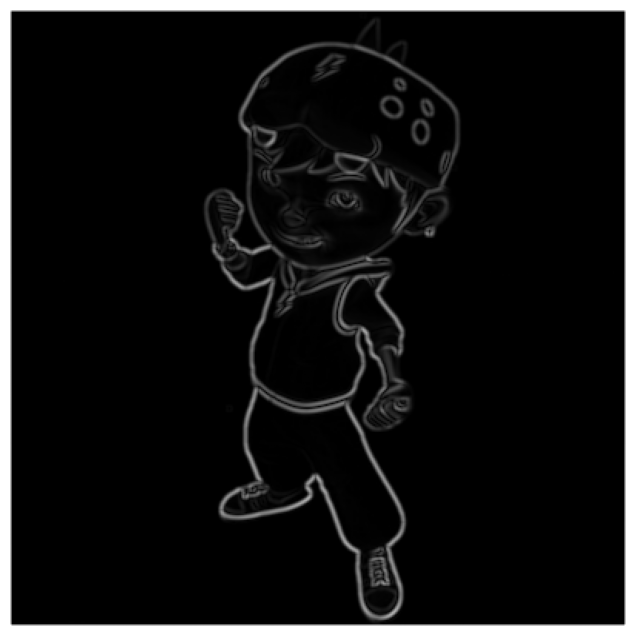

In [30]:
plt.figure(figsize=(16, 8))

prewitt_mean3 = detect(mean_3, Px, Py)
plt.imshow(prewitt_mean3, cmap='gray')
plt.axis('off')
